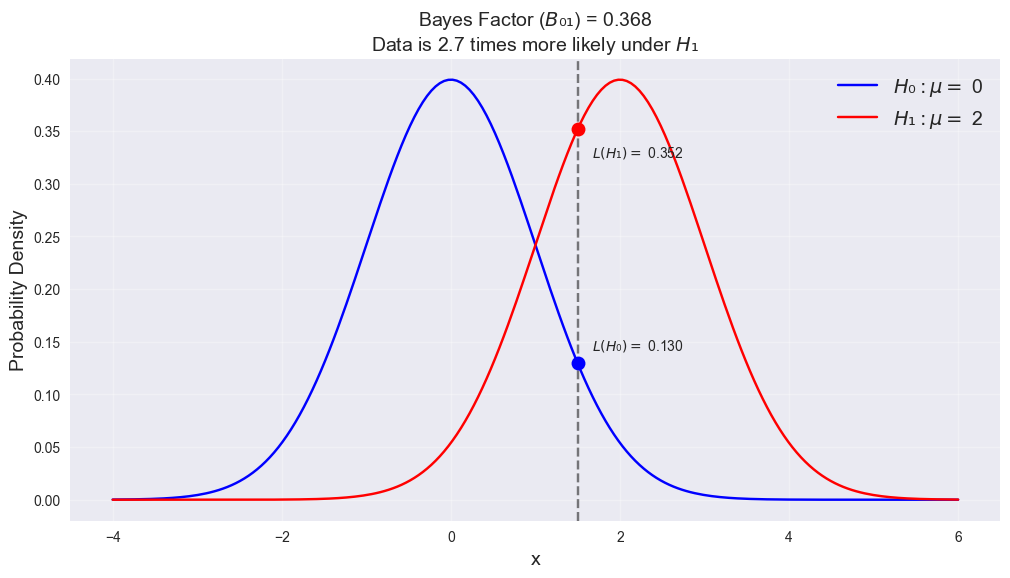

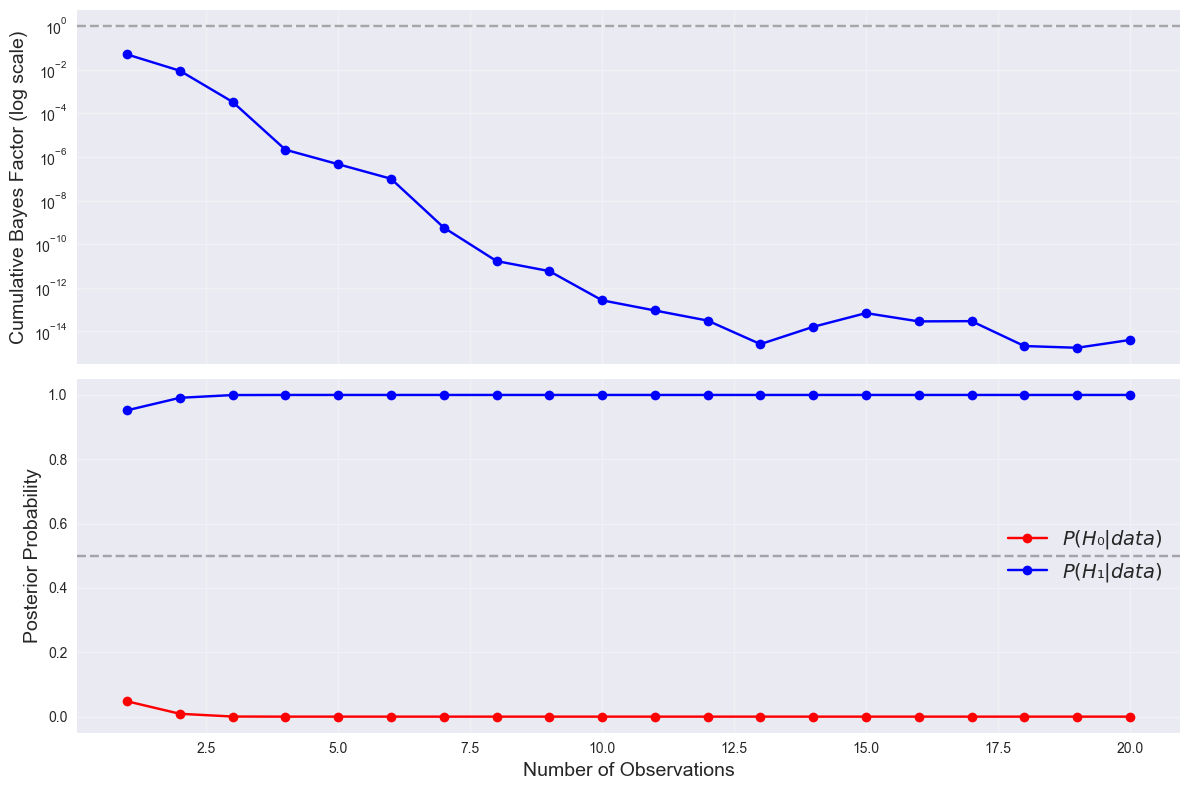

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('seaborn-v0_8')

class BayesianHypothesisTesting:
    def __init__(self, prior_h0=0.5):
        """
        Initialize Bayesian hypothesis testing framework
        
        Parameters:
        -----------
        prior_h0 : float
            Prior probability of null hypothesis (default 0.5 for equal priors)
        """
        self.prior_h0 = prior_h0
        self.prior_h1 = 1 - prior_h0
        
    def normal_pdf(self, x, mu, sigma):
        """Calculate normal probability density"""
        return stats.norm.pdf(x, mu, sigma)
    
    def plot_hypotheses(self, mu0=0, mu1=2, sigma=1, observed_data=None):
        """
        Visualize competing hypotheses and observed data
        
        Parameters:
        -----------
        mu0 : float
            Mean under null hypothesis
        mu1 : float
            Mean under alternative hypothesis
        sigma : float
            Standard deviation (assumed same under both hypotheses)
        observed_data : float
            Observed data point to visualize
        """
        x = np.linspace(mu0-4*sigma, mu1+4*sigma, 200)
        
        # Calculate PDFs
        pdf_h0 = self.normal_pdf(x, mu0, sigma)
        pdf_h1 = self.normal_pdf(x, mu1, sigma)
        
        # Create plot
        plt.figure(figsize=(12, 6))
        plt.plot(x, pdf_h0, 'b-', label=f'$H₀: μ =$ {mu0}')
        plt.plot(x, pdf_h1, 'r-', label=f'$H₁: μ =$ {mu1}')
        
        if observed_data is not None:
            # Add observed data point and likelihoods
            plt.axvline(observed_data, color='k', linestyle='--', alpha=0.5)
            likelihood_h0 = self.normal_pdf(observed_data, mu0, sigma)
            likelihood_h1 = self.normal_pdf(observed_data, mu1, sigma)
            
            plt.plot([observed_data], [likelihood_h0], 'bo', ms=10)
            plt.plot([observed_data], [likelihood_h1], 'ro', ms=10)
            
            # Add annotations
            plt.annotate(f'$L(H₀) =$ {likelihood_h0:.3f}', 
                        xy=(observed_data, likelihood_h0),
                        xytext=(10, 10), textcoords='offset points')
            plt.annotate(f'$L(H₁) =$ {likelihood_h1:.3f}',
                        xy=(observed_data, likelihood_h1),
                        xytext=(10, -20), textcoords='offset points')
            
            # Calculate and display Bayes factor
            bayes_factor = likelihood_h0 / likelihood_h1
            plt.title(f'Bayes Factor ($B₀₁$) = {bayes_factor:.3f}\n' + 
                     f'Data is {max(bayes_factor, 1/bayes_factor):.1f} times more likely under ' +
                     f'$H{"₀" if bayes_factor > 1 else "₁"}$', fontsize=14)
        
        plt.xlabel('x', fontsize=14)
        plt.ylabel('Probability Density', fontsize=14)
        plt.legend(fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.show()
        
    def plot_evidence_accumulation(self, data, mu0=0, mu1=2, sigma=1):
        """
        Visualize how evidence accumulates with multiple observations
        
        Parameters:
        -----------
        data : array-like
            Sequence of observed data points
        mu0, mu1, sigma : float
            Parameters for the competing hypotheses
        """
        # Calculate cumulative Bayes factors and posterior probabilities
        cumulative_bf = np.ones(len(data))
        posterior_h0 = np.zeros(len(data))
        
        for i in range(len(data)):
            # Calculate likelihood ratio for this observation
            likelihood_h0 = self.normal_pdf(data[i], mu0, sigma)
            likelihood_h1 = self.normal_pdf(data[i], mu1, sigma)
            cumulative_bf[i] = cumulative_bf[i-1] * (likelihood_h0/likelihood_h1) if i > 0 else likelihood_h0/likelihood_h1
            
            # Calculate posterior probability
            posterior_h0[i] = (cumulative_bf[i] * self.prior_h0) / \
                            (cumulative_bf[i] * self.prior_h0 + self.prior_h1)
        
        # Create plot
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
        
        # Plot cumulative Bayes factor
        ax1.plot(range(1, len(data)+1), cumulative_bf, 'b-', marker='o')
        ax1.axhline(y=1, color='k', linestyle='--', alpha=0.3)
        ax1.set_ylabel('Cumulative Bayes Factor (log scale)', fontsize=14)
        ax1.set_yscale('log')
        ax1.grid(True, alpha=0.3)
        
        # Plot posterior probabilities
        ax2.plot(range(1, len(data)+1), posterior_h0, 'r-', marker='o', label='$P(H₀|data)$')
        ax2.plot(range(1, len(data)+1), 1-posterior_h0, 'b-', marker='o', label='$P(H₁|data)$')
        ax2.axhline(y=0.5, color='k', linestyle='--', alpha=0.3)
        ax2.set_xlabel('Number of Observations', fontsize=14)
        ax2.set_ylabel('Posterior Probability', fontsize=14)
        ax2.grid(True, alpha=0.3)
        ax2.legend(fontsize=14)
        
        plt.tight_layout()
        plt.show()

# Example usage:
bt = BayesianHypothesisTesting(prior_h0=0.5)

# Plot competing hypotheses with single observation
bt.plot_hypotheses(mu0=0, mu1=2, sigma=1, observed_data=1.5)

# Generate some sample data and plot evidence accumulation
np.random.seed(42)
sample_data = np.random.normal(2, 1, size=20)  # Data generated from H1
bt.plot_evidence_accumulation(sample_data, mu0=0, mu1=2, sigma=1)

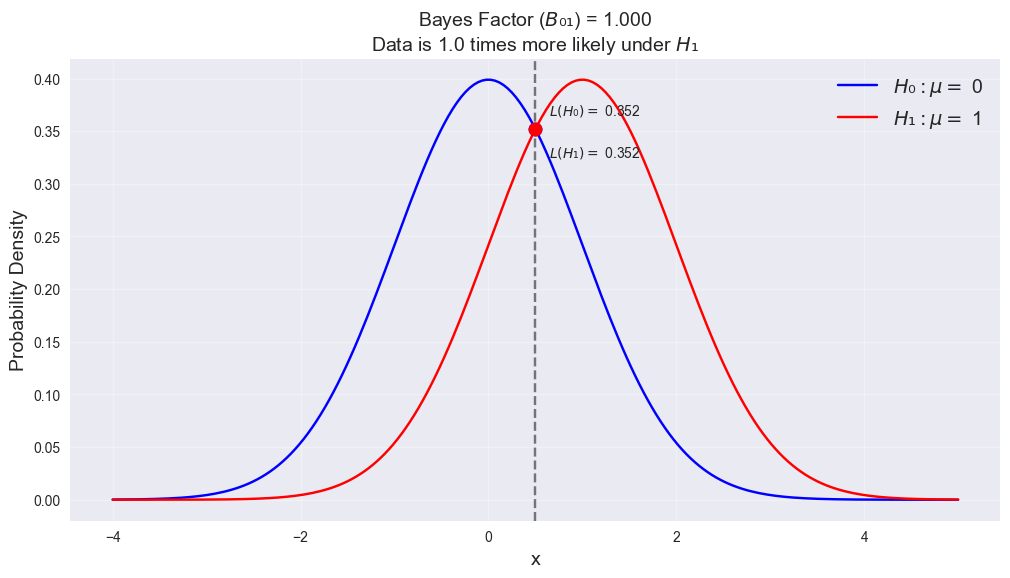

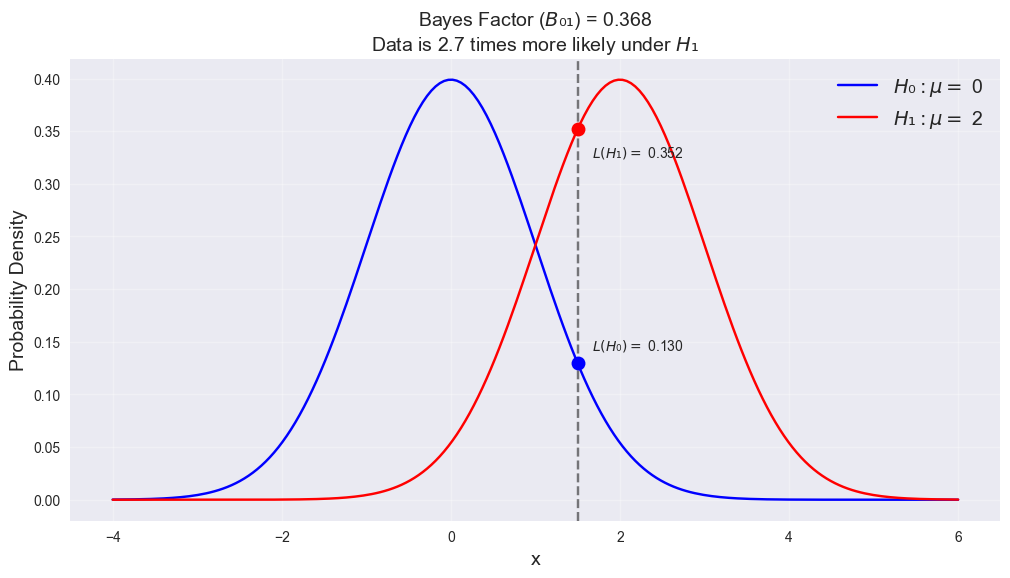

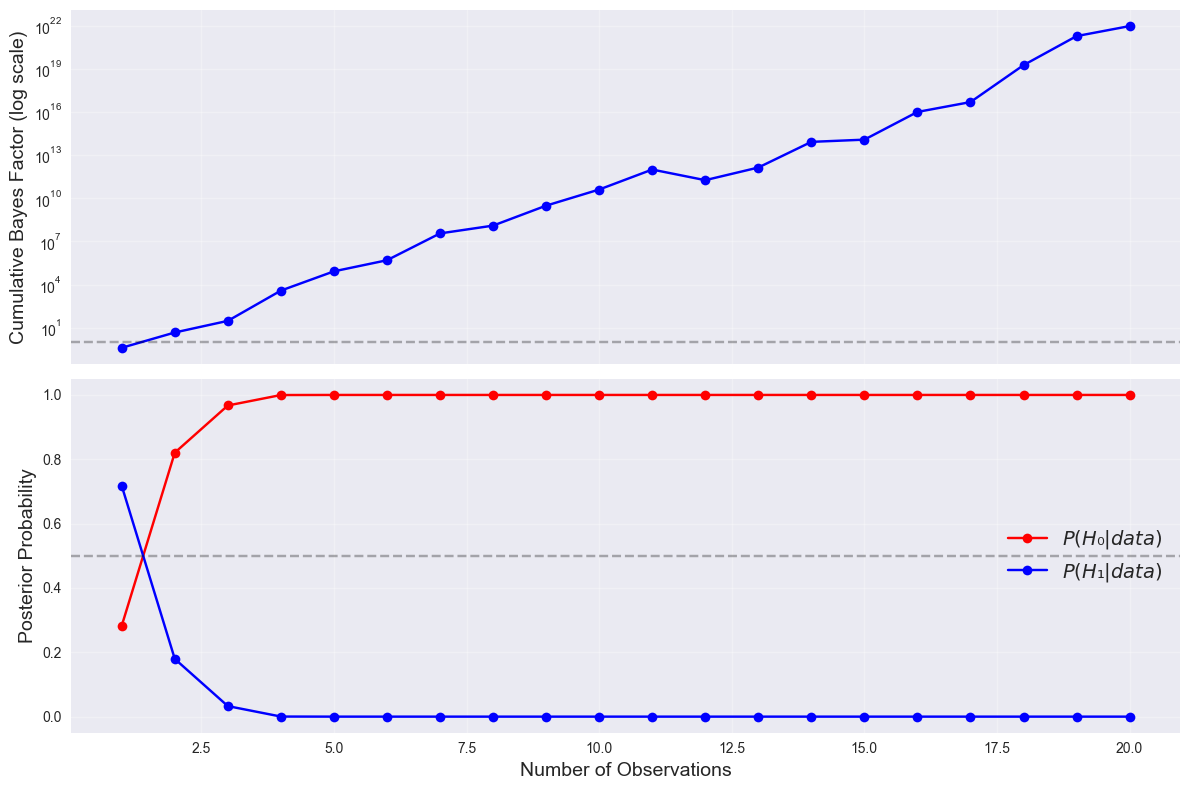

In [7]:
# Compare different hypotheses
bt.plot_hypotheses(mu0=0, mu1=1, sigma=1, observed_data=0.5)

# Try different prior probabilities
bt2 = BayesianHypothesisTesting(prior_h0=0.8)
bt2.plot_hypotheses(mu0=0, mu1=2, sigma=1, observed_data=1.5)

# See how different data affects evidence accumulation
data_from_h0 = np.random.normal(0, 1, size=20)  # Data from null hypothesis
bt.plot_evidence_accumulation(data_from_h0, mu0=0, mu1=2, sigma=1)